In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import glob
import os
from matplotlib.mlab import griddata
from mpl_toolkits.mplot3d import Axes3D

In [2]:
path = r'C:\Users\carrie.morrill\Jupyter\CALIBRATION\ROCK-JUNK'        # trials not meeting Moriasi's "very good" criteria      
all_files = glob.glob(os.path.join(path, "*.txt"))    
df_from_each_file = (pd.read_csv(f, header=None, delim_whitespace=True) for f in all_files)
junk= pd.concat(df_from_each_file, axis=0, ignore_index=True)
junk.columns = ['trial','binf','Dsmax','Soil2','PBIAS-c','NSE-c','RSR-c','PBIAS-v','NSE-v','RSR-v',
            'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
junk = junk.set_index('trial')
junk.head(5)                                                                

,binf,Dsmax,Soil2,PBIAS-c,NSE-c,RSR-c,PBIAS-v,NSE-v,RSR-v,Jan,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
trial,,,,,,,,,,,,,,,,,,,,,
1.0,0.355141,2.973517,0.761958,28.224001,0.673320,0.571560,29.706367,0.692855,0.554207,0.161193,...,0.265408,0.887147,4.073076,7.966554,3.505154,1.019678,0.539912,0.460021,0.286861,0.184087
10.0,0.170887,19.166664,0.332053,-5.017043,0.701453,0.546394,-4.529094,0.809349,0.436635,0.290464,...,0.387796,1.551345,8.984235,12.723657,2.431512,0.329488,0.385520,0.546091,0.498685,0.387197
100.0,0.247989,14.927423,0.768324,16.626402,0.754239,0.495743,17.795023,0.801090,0.445993,0.223148,...,0.303967,0.838383,4.592255,10.725760,3.898893,0.571681,0.390444,0.420741,0.311721,0.239452
1000.0,0.021404,24.093252,0.916679,18.940229,0.696054,0.551313,20.528488,0.742817,0.507133,0.317637,...,0.295768,0.420030,3.015307,10.954465,4.527587,0.725673,0.407433,0.379952,0.356063,0.335796
101.0,0.079702,27.862629,0.224993,-11.765782,0.631344,0.607170,-11.561344,0.748248,0.501749,0.330123,...,0.432666,1.952883,10.267110,12.701622,2.138086,0.356837,0.407707,0.688993,0.653749,0.451004


In [31]:
usgs = pd.read_csv('USGS-06632400.txt',comment='#', usecols=range(2,4), delim_whitespace=True) # read in USGS data
usgs = usgs.drop(usgs.index[0])                                    
usgs.columns = ['datetime','obs_streamflow']                           
usgs = usgs[usgs.obs_streamflow!='Ice']                               
usgs[['obs_streamflow']] = usgs[['obs_streamflow']].apply(pd.to_numeric)  
usgs.loc[:,'obs_streamflow'] /= 35.3147                                
usgs['datetime'] = pd.to_datetime(usgs['datetime'], format='%Y/%m/%d')  
usgs['Month'] = usgs['datetime'].dt.month      
usgs['Year'] = usgs['datetime'].dt.year    
usgs_mon = usgs.groupby(['Year','Month']).mean()  
usgs_mon = usgs_mon.reset_index()
usgs_mon.head(5)        

,Year,Month,obs_streamflow
0,1954,10,0.300432
1,1954,11,0.159896
2,1954,12,0.187987
3,1955,1,0.170175
4,1955,2,0.157563


In [4]:
path = r'C:\Users\carrie.morrill\Jupyter\CALIBRATION\ROCK-GOOD'# trials meeting Moriasi's "very good" criteria for calibration
all_files = glob.glob(os.path.join(path, "*.txt"))    
df_from_each_file = (pd.read_csv(f, header=None, delim_whitespace=True) for f in all_files)
cstats = pd.concat(df_from_each_file, axis=0, ignore_index=True)
cstats.columns = ['trial','binf','Dsmax','Soil2','PBIAS-c','NSE-c','RSR-c','PBIAS-v','NSE-v','RSR-v',
            'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cstats = cstats.set_index('trial')
cstats.head(5)
#print(cstats['PBIAS-v'].mean(),cstats['NSE-v'].mean(),cstats['RSR-v'].mean())

,binf,Dsmax,Soil2,PBIAS-c,NSE-c,RSR-c,PBIAS-v,NSE-v,RSR-v,Jan,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
trial,,,,,,,,,,,,,,,,,,,,,
102.0,0.166484,17.623524,0.519532,5.003445,0.767006,0.482695,5.753457,0.850750,0.386329,0.269055,...,0.325594,1.044129,6.733893,12.467240,3.066044,0.373375,0.360209,0.425830,0.365131,0.309221
109.0,0.315461,14.435758,0.557250,7.497526,0.775423,0.473895,8.276393,0.847582,0.390407,0.231010,...,0.336081,1.130210,6.397809,11.986072,3.157586,0.380880,0.391193,0.466074,0.343285,0.258095
111.0,0.201339,26.303730,0.605512,5.729982,0.771804,0.477698,6.762760,0.851117,0.385854,0.301889,...,0.357120,0.986185,6.140393,12.348084,3.110559,0.485329,0.472654,0.510736,0.411460,0.337279
112.0,0.367487,16.764557,0.509629,3.855023,0.765715,0.484030,4.625092,0.847830,0.390089,0.246754,...,0.365445,1.264379,7.029295,12.278750,2.881391,0.374775,0.436362,0.522953,0.383360,0.282560
115.0,0.240156,15.850341,0.537553,6.255326,0.772023,0.477469,7.015679,0.849829,0.387519,0.249103,...,0.331291,1.089522,6.554074,12.240486,3.112301,0.374572,0.376463,0.446858,0.352624,0.281670


In [5]:
merged = pd.concat([junk,cstats])  
merged.head(5)

,binf,Dsmax,Soil2,PBIAS-c,NSE-c,RSR-c,PBIAS-v,NSE-v,RSR-v,Jan,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
trial,,,,,,,,,,,,,,,,,,,,,
1.0,0.355141,2.973517,0.761958,28.224001,0.673320,0.571560,29.706367,0.692855,0.554207,0.161193,...,0.265408,0.887147,4.073076,7.966554,3.505154,1.019678,0.539912,0.460021,0.286861,0.184087
10.0,0.170887,19.166664,0.332053,-5.017043,0.701453,0.546394,-4.529094,0.809349,0.436635,0.290464,...,0.387796,1.551345,8.984235,12.723657,2.431512,0.329488,0.385520,0.546091,0.498685,0.387197
100.0,0.247989,14.927423,0.768324,16.626402,0.754239,0.495743,17.795023,0.801090,0.445993,0.223148,...,0.303967,0.838383,4.592255,10.725760,3.898893,0.571681,0.390444,0.420741,0.311721,0.239452
1000.0,0.021404,24.093252,0.916679,18.940229,0.696054,0.551313,20.528488,0.742817,0.507133,0.317637,...,0.295768,0.420030,3.015307,10.954465,4.527587,0.725673,0.407433,0.379952,0.356063,0.335796
101.0,0.079702,27.862629,0.224993,-11.765782,0.631344,0.607170,-11.561344,0.748248,0.501749,0.330123,...,0.432666,1.952883,10.267110,12.701622,2.138086,0.356837,0.407707,0.688993,0.653749,0.451004


In [27]:
# how many of the 167 trials that "pass" calibration also "pass" validation?
vstats = cstats[(cstats['PBIAS-v']<10) & (cstats['PBIAS-v']>-10) & (cstats['NSE-v']>0.75) & (cstats['RSR-v']<0.5)]
len(vstats.index)

147

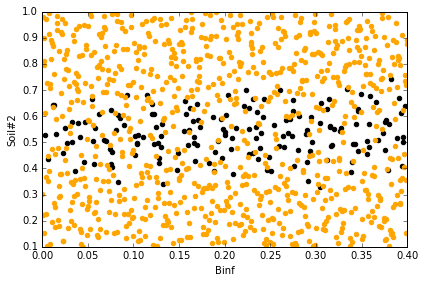

In [37]:
plt.scatter(cstats['binf'],cstats['Soil2'],color="black")  # black dots = meet Moriasi criteria
plt.scatter(junk['binf'],junk['Soil2'],color="orange")     # orange dots = do not meet criteria
plt.xlim(0, 0.4)
plt.ylim(0.1,1.0)
plt.xlabel('Binf')
plt.ylabel('Soil#2')
plt.tight_layout()
plt.show()

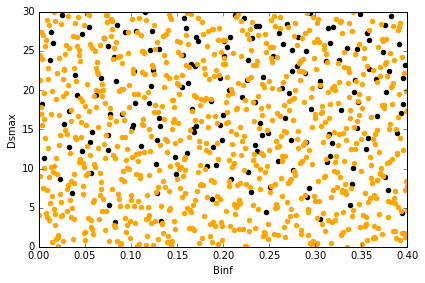

In [36]:
plt.scatter(cstats['binf'],cstats['Dsmax'],color="black")
plt.scatter(junk['binf'],junk['Dsmax'],color="orange")
plt.xlim(0, 0.4)
plt.ylim(0,30)
plt.xlabel('Binf')
plt.ylabel('Dsmax')
plt.tight_layout()
plt.show()

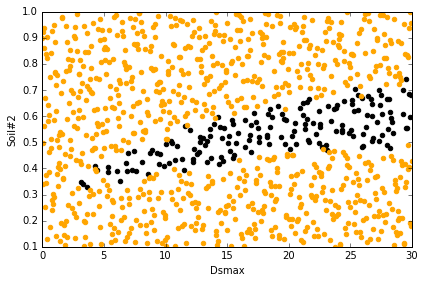

In [35]:
plt.scatter(cstats['Dsmax'],cstats['Soil2'],color="black")
plt.scatter(junk['Dsmax'],junk['Soil2'],color="orange")
plt.xlim(0, 30)
plt.ylim(0.1,1.0)
plt.xlabel('Dsmax')
plt.ylabel('Soil#2')
plt.tight_layout()
plt.show()

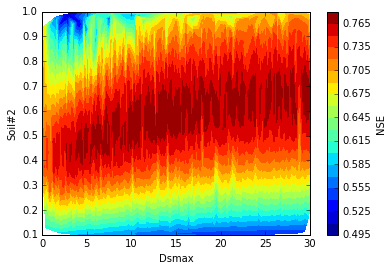

In [39]:
plt.tricontourf(merged['Dsmax'],merged['Soil2'],merged['NSE-c'], 20)
plt.xlabel('Dsmax')
plt.ylabel('Soil#2')
cbar = plt.colorbar()
cbar.set_label('NSE', rotation=90)
plt.show()

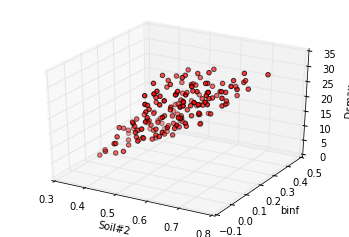

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(cstats['Soil2'], cstats['binf'], cstats['Dsmax'], c='r', marker='o')

ax.set_xlabel('Soil#2')
ax.set_ylabel('binf')
ax.set_zlabel('Dsmax')

plt.show()